In [1]:
# from comparison_bias import get_XY_gridpoints, gp_experiments, nn_experiments

# X,Y, grid_points = get_XY_gridpoints()

# gp_mean, gp_var = gp_experiments(X,Y,grid_points)#, fig, axes )
# nn_results = nn_experiments(X,Y,grid_points)#, fig, axes )


In [171]:
import sys
import gpflow
assert (gpflow.__version__ == "0.5")
import tensorflow
assert (tensorflow.__version__ == "1.9.0")
import torch
assert (torch.__version__ =="0.3.1")



In [2]:
%ls

__pycache__/                   process_comparison_ML.py
comparison_ML.py               process_comparison_bias.py
comparison_bias.py             process_comparison_bias_2d.py
comparison_bias_2d.py          process_comparison_four.py
comparison_bias_four.py        process_comparison_yacht.py
comparison_smooth_xor.py       process_mmds.py
comparison_snelson.py          process_mmds_all.py
comparison_yacht.py            process_smooth_xor.py
datasets/                      process_snelson.py
defaults.py                    results/
mmd_experiment.py              shared.py
our_exp.ipynb


In [3]:
from shared import get_nn_model,draw_sample_from_nn_prior,ResultsManager, nn_model_regression

import matplotlib.pyplot as plt 
import defaults
import torch
import numpy as np

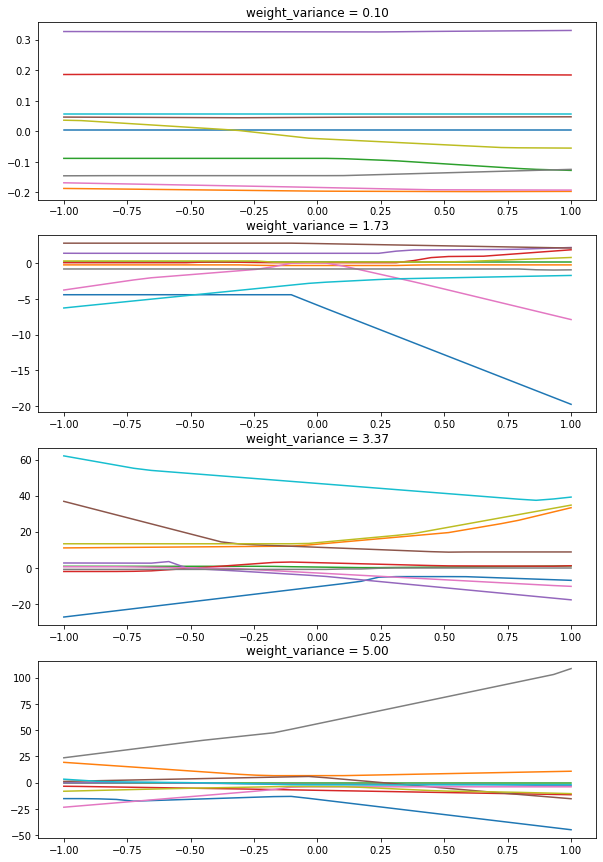

In [166]:

D_IN = 1
H = 3
D_OUT = 1
num_layers = 3
weight_variance = 0.8
bias_variance = 0.2

list_weight_variance = np.linspace(0.1,5,4)
fig, axs = plt.subplots(len(list_weight_variance),1,figsize = (10,15))
rep = 10
for k,weight_variance in enumerate(list_weight_variance):
    axs[k].set_title('weight_variance = %.2f'%(weight_variance))
    for i in range(rep):
        model = get_nn_model(D_IN,H,D_OUT, num_layers, width_class='identity', weight_variance=weight_variance, bias_variance=weight_variance/4)

        grid = np.atleast_2d(
        np.linspace(-1,1,30).astype(np.float32)
        ).T
        grid_var = torch.autograd.Variable(
            torch.from_numpy(grid).type(defaults.tdtype), requires_grad=False
        )

        output = model(grid_var)

        axs[k].plot(grid, output.data.numpy())
        
# for weight_variance in np.linspace(0.1,5,3):
#     model = get_nn_model(D_IN,H,D_OUT, num_layers, width_class='identity', weight_variance=weight_variance, bias_variance=None)
 
#     grid = np.atleast_2d(
#     np.linspace(-1,1,30).astype(np.float32)
#     ).T
#     grid_var = torch.autograd.Variable(
#         torch.from_numpy(grid).type(defaults.tdtype), requires_grad=False
#     )

#     output = model(grid_var)
    
#     plt.plot(grid, output.data.numpy(),label = 'weight_variance = %.2f'%(weight_variance))
# plt.legend()

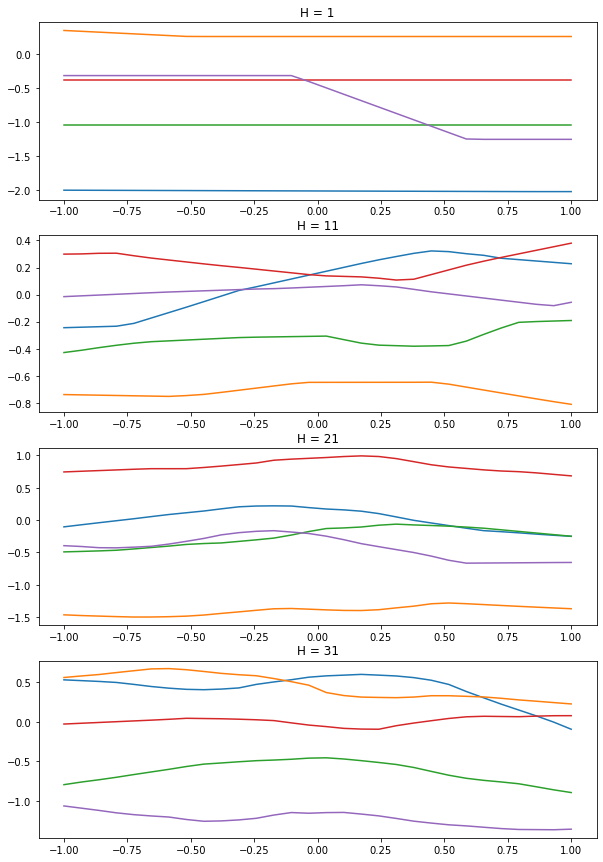

In [167]:

D_IN = 1
H = 5
D_OUT = 1
num_layers = 3
weight_variance = 0.8
bias_variance = 0.2

list_H = list(range(1,40,10))
fig, axs = plt.subplots(len(list_H),1,figsize = (10,15))
rep = 5
for k,H in enumerate(list_H):
    axs[k].set_title('H = %s'%(H))
    for i in range(rep):
        model = get_nn_model(D_IN,H,D_OUT, num_layers, width_class='identity', weight_variance=weight_variance, bias_variance=bias_variance)

        grid = np.atleast_2d(
        np.linspace(-1,1,30).astype(np.float32)
        ).T
        grid_var = torch.autograd.Variable(
            torch.from_numpy(grid).type(defaults.tdtype), requires_grad=False
        )

        output = model(grid_var)

        axs[k].plot(grid, output.data.numpy())


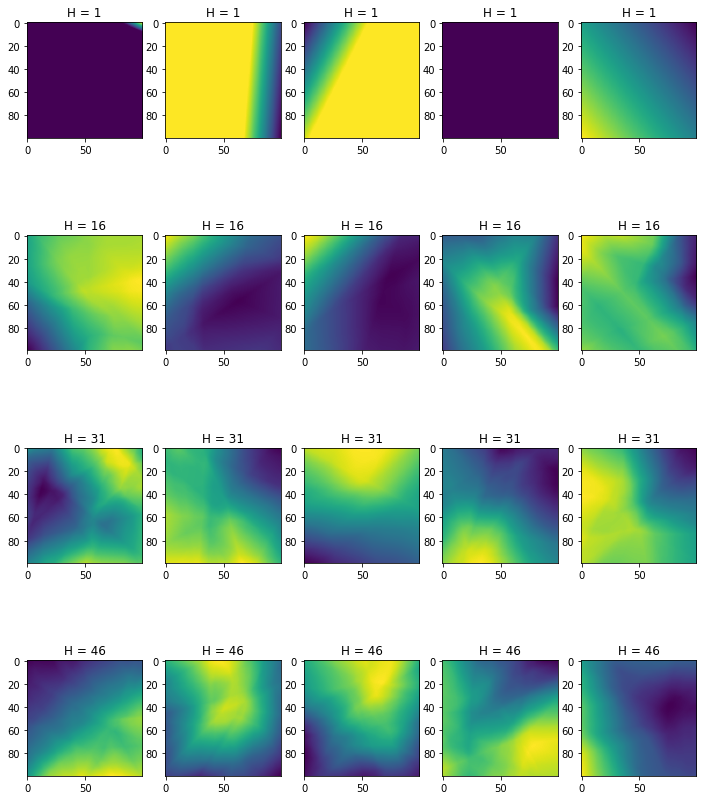

In [164]:

D_IN = 2
H = 3
D_OUT = 1
num_layers = 2
weight_variance = 0.8
bias_variance = 0.2


l_grid = 100
grid_x = np.linspace(-1,1,l_grid)
grid_y = np.linspace(-1,1,l_grid)

grid_x, grid_y = np.meshgrid(grid_x, grid_y)
grid_x = grid_x.flatten()
grid_y = grid_y.flatten()
grid = np.vstack((grid_x,grid_y)).T
grid_var = torch.autograd.Variable(
        torch.from_numpy(grid).type(defaults.tdtype), requires_grad=False
    )

list_H = list(range(1,60,15))
rep = 5
fig, axs = plt.subplots(len(list_H),rep,figsize = (12,15))
for k,H in enumerate(list_H):
    for i in range(rep):
        model = get_nn_model(D_IN,H,D_OUT, num_layers, width_class='identity', weight_variance=weight_variance, bias_variance=bias_variance)

        output = model(grid_var)

        axs[k,i].imshow(output.data.numpy().reshape(l_grid,l_grid),)
        axs[k,i].set_title('H = %s'%(H))


1.1355009


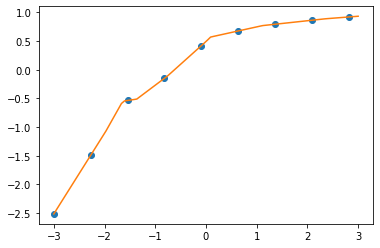

In [172]:
from shared import ResultsManager, nn_model_regression

D_IN = 1
H = 3
D_OUT = 1
num_layers = 3
weight_variance_0 = 0.8
bias_variance_0 = 0.2

min_range, max_range = -2, 2

gen_model = get_nn_model(
    D_IN,
    H,
    D_OUT,
    num_layers,
    width_class="identity",
    weight_variance=weight_variance_0/H,
    bias_variance=bias_variance_0/H,
)

n_data = 8

grid = np.atleast_2d(
    np.linspace(1.5 * min_range, 1.5 * max_range, 100).astype(np.float32)
).T
grid_var = torch.autograd.Variable(
    torch.from_numpy(grid).type(defaults.tdtype), requires_grad=False
)
true_val = gen_model(grid_var)
true_val = true_val.detach()

std, mean = true_val.std(),true_val.mean()
true_val = (true_val-mean)/std

X = grid[torch.from_numpy(np.arange(0,100,100//n_data).astype(int))]
X_var = torch.autograd.Variable(
    torch.from_numpy(X).type(defaults.tdtype), requires_grad=False
)
Y_var = true_val[torch.from_numpy(np.arange(0,100,100//n_data).astype(int))]
Y_var = Y_var.detach()


true_val = true_val.data.numpy()
Y = Y_var.data.numpy().reshape(-1, 1)


plt.plot(X, Y, "o")
plt.plot(grid, true_val)
eps = np.std(Y)
print(eps)

In [173]:
true_val.shape

(100, 1)

<class 'torch.autograd.variable.Variable'> <class 'torch.autograd.variable.Variable'> <class 'torch.autograd.variable.Variable'> <class 'torch.autograd.variable.Variable'>
<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>
torch.Size([100, 1]) torch.Size([24, 1]) torch.Size([24, 1]) torch.Size([100, 1])


(None,)

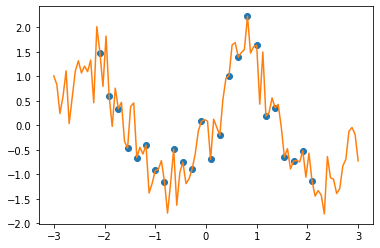

In [174]:
n_data = 30

T = 3

grid = np.atleast_2d(
    np.linspace(1.5 * min_range, 1.5 * max_range, 100).astype(np.float32)
).T
grid_var = torch.autograd.Variable(
    torch.from_numpy(grid).type(defaults.tdtype), requires_grad=False
)

true_val_var = np.sin(2 * np.pi * grid / T) + np.random.normal(
    scale=0.3, size=grid.shape
)

true_val_var = torch.autograd.Variable(
    torch.from_numpy(true_val_var).type(defaults.tdtype), requires_grad=False
)

std, mean = true_val_var.std(), true_val_var.mean()
true_val_var = (true_val_var - mean) / std
true_val = true_val_var.data.numpy()
X = grid[
    torch.from_numpy(np.arange(0 + 15, 100 - 15, 100 // n_data).astype(int))
]
X_var = torch.autograd.Variable(
    torch.from_numpy(X).type(defaults.tdtype), requires_grad=False
)
Y_var = true_val_var[
    torch.from_numpy(np.arange(0 + 15, 100 - 15, 100 // n_data).astype(int))
]
Y_var = Y_var.detach()

Y = Y_var.data.numpy()


plt.plot(X, Y, "o")
plt.plot(grid, true_val_var.data.numpy())
eps = np.std(Y)

print(type(grid_var), type(X_var), type(Y_var), type(true_val_var)),
print(type(grid), type(X), type(Y), type(true_val)),
print(grid_var.shape, X_var.shape, Y_var.shape, true_val_var.shape),


1.541876018286751 2.009070682854339 0.13440146888702023


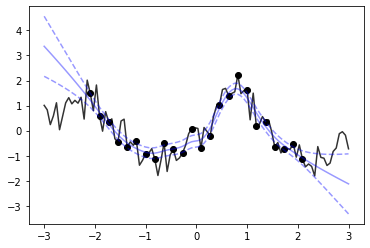

In [175]:
from RecursiveKernel import DeepArcCosine
from experiments.shared import get_gp_model

weight_variance_0 = 0.8
bias_variance_0 = 0.2

def getRunGPModel(X,Y):
    kernel = DeepArcCosine(input_dim=1, num_steps=H, variance = weight_variance_0, bias_variance = bias_variance_0)
    model = gpflow.gpr.GPR( X=X, Y=Y, kern=kernel)
    gp_model = get_gp_model(X,Y,input_dim=X.shape[1],depth=num_layers)

    gp_model.optimize()
    return gp_model

gpModel = getRunGPModel(X,Y)
gp_mean, gp_var = gpModel.predict_f(grid) 

bias_variance = gpModel.kern.bias_variance.value[0]
weight_variance = gpModel.kern.variance.value[0]
noise_variance = gpModel.likelihood.variance.value[0]
print(bias_variance,weight_variance,noise_variance)


plt.plot(X, Y,'o',label = 'train _data', color = 'black')
plt.plot(grid, true_val,alpha=0.8, color = 'black')

plt.plot(grid, gp_mean,color='blue', alpha = 0.4, label = 'GP_pred')
plt.plot(grid, gp_mean - np.sqrt(gp_var),'--',color='blue', alpha = 0.4)
plt.plot(grid, gp_mean + np.sqrt(gp_var),'--',color='blue', alpha = 0.4)


In [176]:
# X = np.atleast_2d( np.array([-1.,-.5, 0.,.5, 1.], np.float32 ) ).T
# Y = np.array( [ [-1.,-.5, 0., .5, 1.] ], np.float32 ).T
# grid = np.atleast_2d( np.linspace( -2. , 2., 100 ) ).T    

# print(X.shape, Y.shape)

In [177]:
# mask = torch.arange(0,10,2)
# X_train, Y_train = X[mask], Y[mask]
# mask = torch.arange(1,10,2)
# X_test, Y_test = X[mask], Y[mask]
# plt.plot(X_train.detach().numpy(), Y_train.detach().numpy(),'o')
# plt.plot(X_test.detach().numpy(), Y_test.detach().numpy(),'o')
# plt.show()

In [178]:

model = get_nn_model(
    D_IN,
    H,
    D_OUT,
    num_layers,
    width_class="identity",
    weight_variance=weight_variance,
    bias_variance=bias_variance,
)

nthin = 10
burn_in = 300
results_manager_same_H = ResultsManager(
    true_val, burn_in, nthin, True, True, True, True, True
)

nn_model_regression(
    X_var,
    Y_var,
    grid_var,
    model,
    num_samples=3000,
    epsilon = 0.001,
    beta = 0.1,
    leap_frog_iters = 10,
    results_manager=results_manager_same_H,
)


  0%|          | 0/3000 [00:00<?, ?it/s]

initializing
initializing
initializing
initializing
initializing
initializing
initializing
initializing


100%|██████████| 3000/3000 [01:13<00:00, 40.89it/s]

Total time 73.37032198905945
iterations per second 40.8884671440769


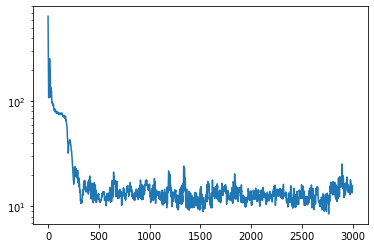

In [179]:
E_same_H = results_manager_same_H.energies
mu_same_H = results_manager_same_H.online_mean
var_same_H = results_manager_same_H.var
plt.plot(E_same_H,label = 'E high H')
plt.yscale('log')

In [180]:
large_H = 50
model = get_nn_model(
    D_IN,
    large_H,
    D_OUT,
    num_layers,
    width_class="identity",
      weight_variance=weight_variance,
    bias_variance=bias_variance,
)

nthin = 1
burn_in = 300
results_manager = ResultsManager(
    true_val, burn_in, nthin, True, True, True, True, True
)

nn_model_regression(
    X_var,
    Y_var,
    grid_var,
    model,
    num_samples=3000,
    noise_variance=noise_variance,
     epsilon = 0.0005,
    beta = 0.1,
    leap_frog_iters = 10,
    results_manager=results_manager,
)


  0%|          | 4/3000 [00:00<01:31, 32.74it/s]

initializing
initializing
initializing
initializing
initializing
initializing
initializing
initializing


100%|██████████| 3000/3000 [01:29<00:00, 33.66it/s]

Total time 89.13436794281006
iterations per second 33.657051362330236


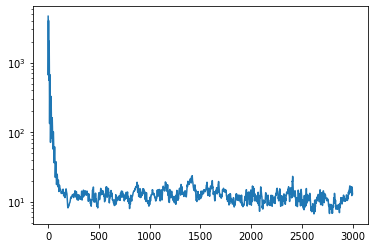

In [181]:

E = results_manager.energies
mu = results_manager.online_mean
var = results_manager.var
plt.plot(E,label = 'E same H')
plt.yscale('log')

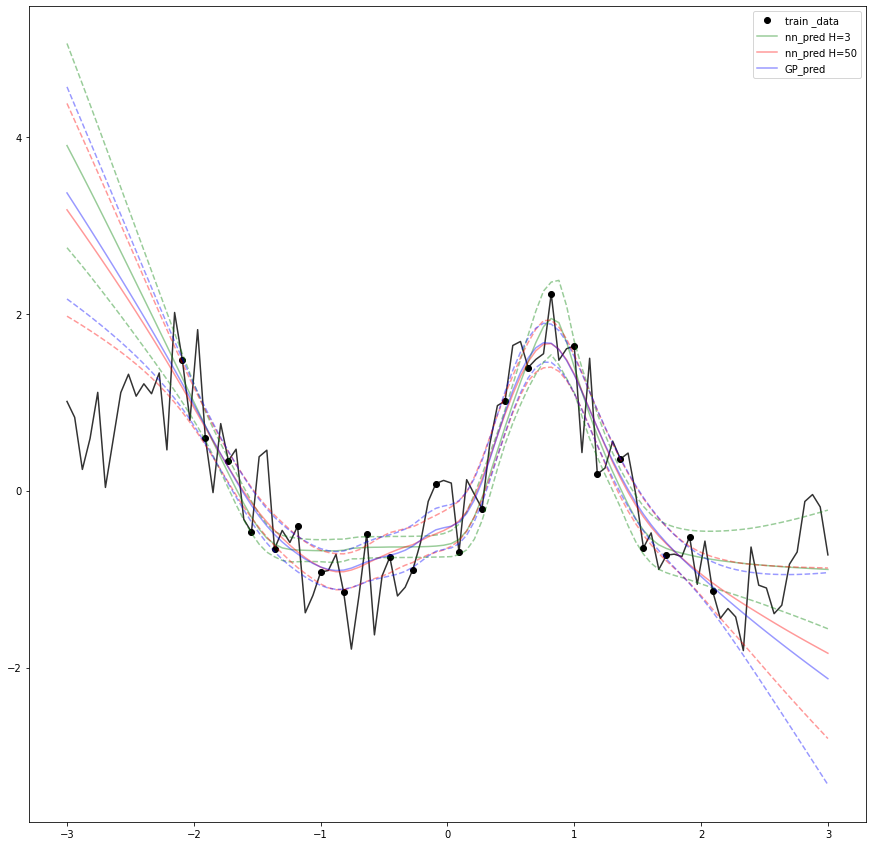

In [183]:
plt.figure(figsize=(15,15))

plt.plot(X, Y,'o',label = 'train _data', color = 'black')
plt.plot(grid, true_val,alpha=0.8, color = 'black')


plt.plot(grid, mu_same_H ,color='green', alpha = 0.4, label = f'nn_pred H={H}')
plt.plot(grid, mu_same_H - np.sqrt(var_same_H),'--',color='green', alpha = 0.4)
plt.plot(grid, mu_same_H + np.sqrt(var_same_H),'--',color='green', alpha = 0.4)


plt.plot(grid, mu ,color='red', alpha = 0.4, label = f'nn_pred H={large_H}')
plt.plot(grid, mu - np.sqrt(var),'--',color='red', alpha = 0.4)
plt.plot(grid, mu + np.sqrt(var),'--',color='red', alpha = 0.4)


plt.plot(grid, gp_mean,color='blue', alpha = 0.4, label = 'GP_pred')
plt.plot(grid, gp_mean - np.sqrt(gp_var),'--',color='blue', alpha = 0.4)
plt.plot(grid, gp_mean + np.sqrt(gp_var),'--',color='blue', alpha = 0.4)


plt.legend()
